In [1]:
import os
from pathlib import Path

def root_dir(marker="EXPLib"):
    cwd = Path.cwd()
    # if cwd already contains the marker
    if (cwd / marker).is_dir():
        return cwd
    # otherwise walk up the parents
    for p in cwd.parents:
        if (p / marker).is_dir():
            return p
    raise FileNotFoundError(f"Root marker '{marker}' not found")

os.chdir(root_dir())
#print(os.getcwd())

In [2]:
from EXPLib.xai_library.data_explainers.data_profiling import data_profiling_utils

In [3]:
img_path = './EXPLib/datasets/Camera/toy_model_v1_inference/dev/images'
annotation_path='./EXPLib/datasets/Camera/toy_model_v1_inference/dev/satellite_objdet_coco_dataset.json'

Computing image statistics...
Computing bounding box statistics...

Label Distribution:
satellite: 9999

--- Image Statistics Summary ---
           image_id   width  height  aspect_ratio   mean_pixel    std_pixel  \
count   9999.000000  9999.0  9999.0        9999.0  9999.000000  9999.000000   
mean    5001.000000   320.0   320.0           1.0    13.345956    14.239332   
std     2886.607005     0.0     0.0           0.0    21.969917    13.380372   
min        2.000000   320.0   320.0           1.0     0.337686     0.147968   
25%     2501.500000   320.0   320.0           1.0     1.816206     4.578455   
50%     5001.000000   320.0   320.0           1.0     4.371035    10.003033   
75%     7500.500000   320.0   320.0           1.0    14.583232    19.737549   
max    10000.000000   320.0   320.0           1.0   223.750234   106.612060   

        brightness     contrast  
count  9999.000000  9999.000000  
mean     13.345956    14.239332  
std      21.969917    13.380372  
min       0.33

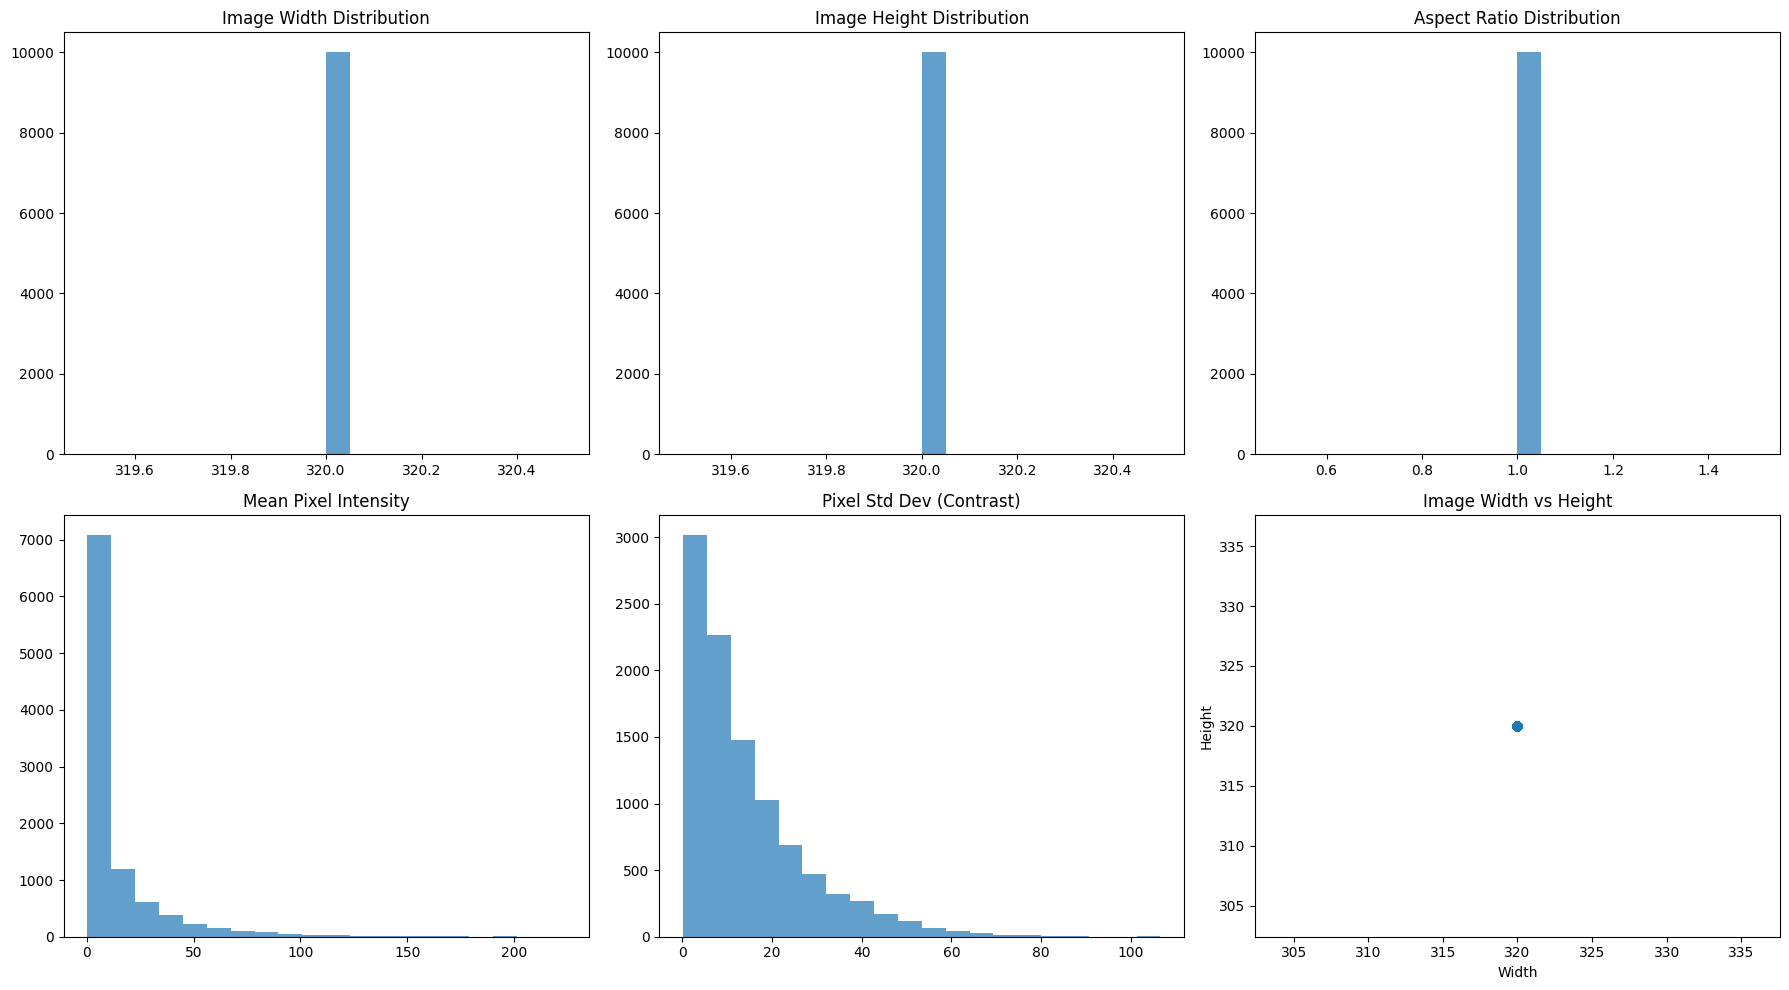

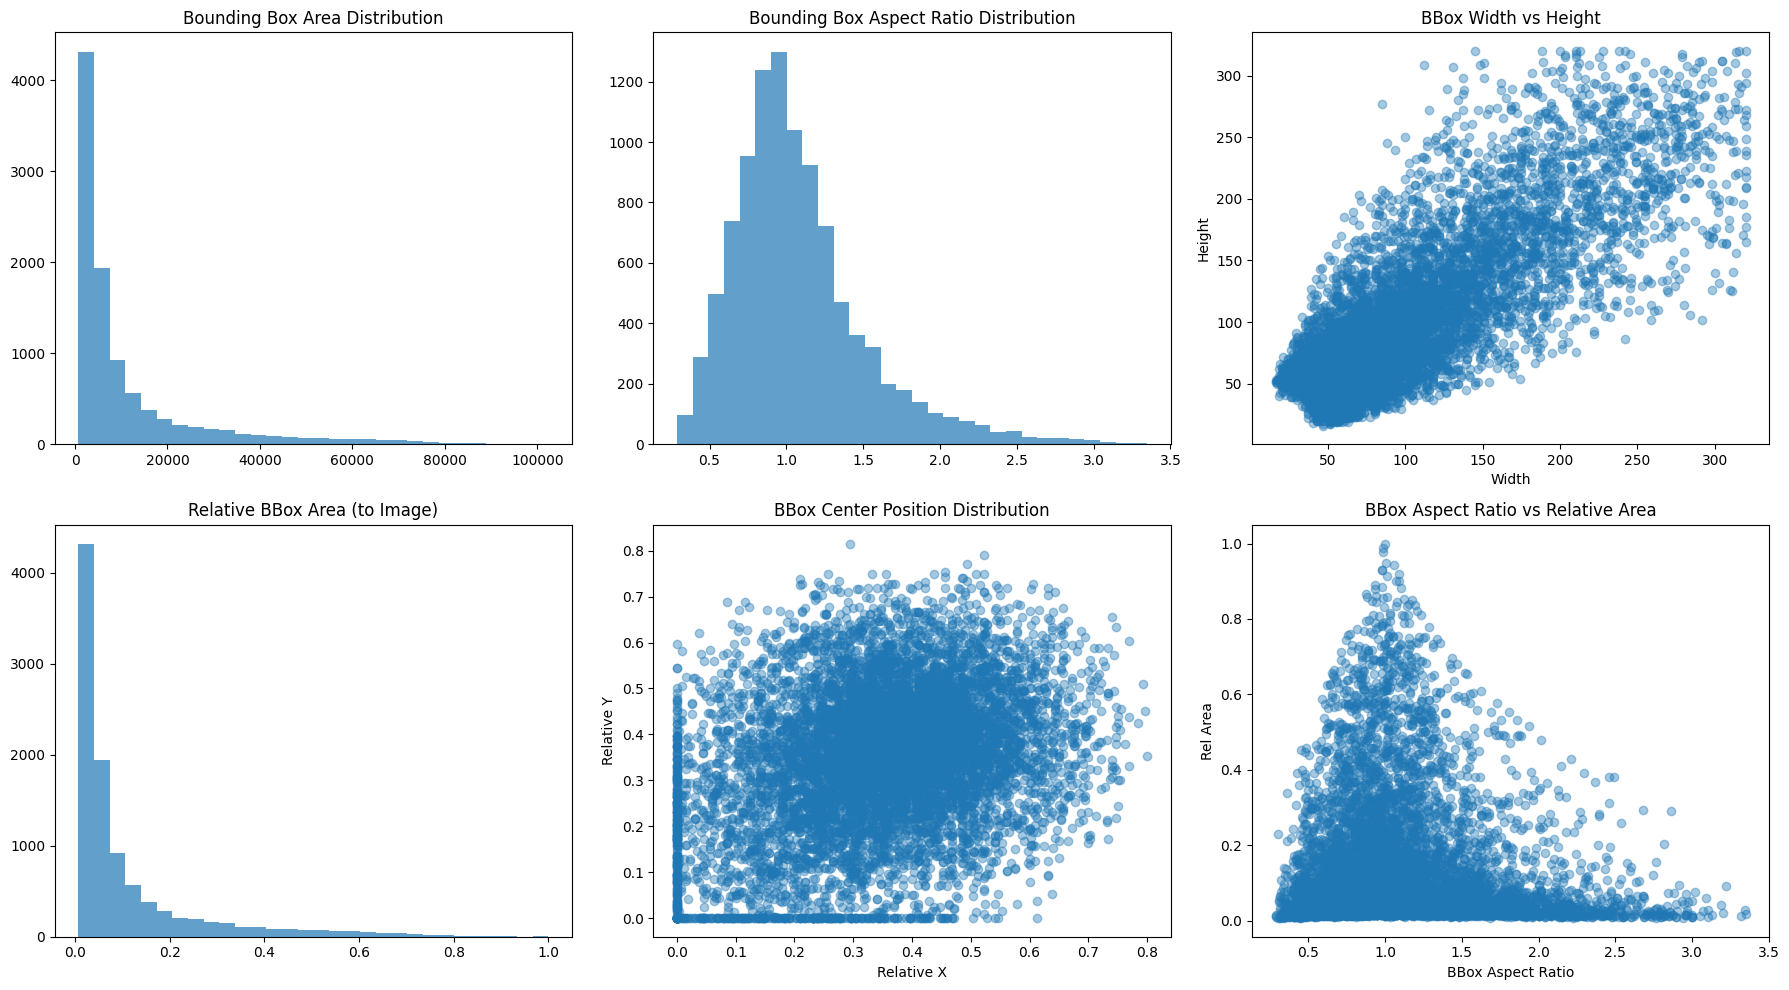

In [4]:
annotations = data_profiling_utils.load_annotations(annotation_path)

print("Computing image statistics...")
image_stats_df = data_profiling_utils.compute_image_statistics(annotations, img_path)

print("Computing bounding box statistics...")
bbox_df = data_profiling_utils.compute_bbox_statistics(annotations)

label_distribution = data_profiling_utils.compute_label_distribution(annotations)

print("\nLabel Distribution:")
for label, count in label_distribution.items():
    print(f"{label}: {count}")

print("\n--- Image Statistics Summary ---")
print(image_stats_df.describe())

print("\n--- BBox Statistics Summary ---")
print(bbox_df.describe())

data_profiling_utils.plot_image_statistics(image_stats_df)
data_profiling_utils.plot_bbox_statistics(bbox_df)